##### Importing Sklearn libreries for Regeression purpose

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

##### Importing the housing price dataset using pandas

In [2]:
df = pd.read_csv(r'C:\Users\Lenovo\ML_Practice\Housing_Price.csv')
print('Data Shape = ', df.shape)
df.head(10)

Data Shape =  (4600, 18)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014 00:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 00:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-2014 00:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-2014 00:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-2014 00:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,02-05-2014 00:00,490000.0,2,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,02-05-2014 00:00,335000.0,2,2.00,1350,2560,1.0,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,02-05-2014 00:00,482000.0,4,2.50,2710,35868,2.0,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,02-05-2014 00:00,452500.0,3,2.50,2430,88426,1.0,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,02-05-2014 00:00,640000.0,4,2.00,1520,6200,1.5,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


##### DATA CLEANING PROCESS

##### Checking of NaN value in the above dataset

In [3]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
date             4600 non-null object
price            4600 non-null float64
bedrooms         4600 non-null int64
bathrooms        4600 non-null float64
sqft_living      4600 non-null int64
sqft_lot         4600 non-null int64
floors           4600 non-null float64
waterfront       4600 non-null int64
view             4600 non-null int64
condition        4600 non-null int64
sqft_above       4600 non-null int64
sqft_basement    4600 non-null int64
yr_built         4600 non-null int64
yr_renovated     4600 non-null int64
street           4600 non-null object
city             4600 non-null object
statezip         4600 non-null object
country          4600 non-null object
dtypes: float64(3), int64(10), object(5)
memory usage: 647.0+ KB


In [5]:
df.date.values

array(['02-05-2014 00:00', '02-05-2014 00:00', '02-05-2014 00:00', ...,
       '09-07-2014 00:00', '10-07-2014 00:00', '10-07-2014 00:00'],
      dtype=object)

##### Conversion of datetime to numerical value using to_datetime command

In [6]:
df['date'] = (pd.to_datetime(df.date.values).astype(int)/10**9).astype(float)

In [7]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,1.391558e+09,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,1.391558e+09,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,1.391558e+09,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,1.391558e+09,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,1.391558e+09,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [8]:
df.date.values

array([1.3915584e+09, 1.3915584e+09, 1.3915584e+09, ..., 1.4100480e+09,
       1.4126400e+09, 1.4126400e+09])

In [9]:
df.waterfront.unique()

array([0, 1], dtype=int64)

##### Using LabelEncoder() to convert categorical values to numerical values
##### that is, label encoder converts string or float type values to integer values

In [10]:
le = LabelEncoder()

In [11]:
df['date'] = le.fit_transform(df['date'])
df['price'] = le.fit_transform(df['price'])
df['bathrooms'] = le.fit_transform(df['bathrooms'])
df['floors'] = le.fit_transform(df['floors'])
df['street'] = le.fit_transform(df['street'])
df['city'] = le.fit_transform(df['city'])
df['statezip'] = le.fit_transform(df['statezip'])
df['country'] = le.fit_transform(df['country'])

In [12]:
df.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2,402,3,4,1340,7912,1,0,0,3,1340,0,1955,2005,1522,36,62,0
1,2,1719,5,8,3650,9050,2,0,4,5,3370,280,1921,0,3899,35,58,0
2,2,487,3,6,1930,11947,0,0,0,4,1930,0,1966,0,2291,18,26,0
3,2,706,3,7,2000,8030,0,0,0,4,1000,1000,1963,0,4263,3,7,0
4,2,998,4,8,1940,10500,0,0,0,4,1140,800,1976,1992,4352,31,31,0
5,2,874,2,2,880,6380,0,0,0,3,880,0,1938,1994,3521,35,54,0
6,2,469,2,6,1350,2560,0,0,0,3,1350,0,1976,0,2286,31,31,0
7,2,851,4,8,2710,35868,2,0,0,3,2710,0,1989,0,2038,21,23,0
8,2,781,3,8,2430,88426,0,0,0,4,1570,860,1985,0,3369,27,27,0
9,2,1146,4,6,1520,6200,1,0,0,3,1520,0,1945,2010,3846,35,54,0


In [13]:
df.bedrooms.unique()

array([3, 5, 4, 2, 6, 7, 9, 1, 8, 0], dtype=int64)

In [14]:
df.describe()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.0
mean,35.652174,813.921957,3.400870,6.642174,2139.346957,1.485252e+04,1.024130,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261,2265.385870,25.674348,38.743696,0.0
std,20.161597,460.032743,0.908848,3.121133,963.206916,3.588444e+04,1.076577,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536,1307.591795,11.982721,20.919517,0.0
min,0.000000,0.000000,0.000000,0.000000,370.000000,6.380000e+02,0.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,17.000000,426.750000,3.000000,5.000000,1460.000000,5.000750e+03,0.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,1132.750000,17.000000,21.000000,0.0
50%,39.000000,803.500000,3.000000,7.000000,1980.000000,7.683000e+03,1.000000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,2263.500000,32.000000,41.000000,0.0
75%,53.000000,1168.250000,4.000000,8.000000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000,3400.250000,35.000000,56.000000,0.0
max,69.000000,1740.000000,9.000000,25.000000,13540.000000,1.074218e+06,5.000000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000,4524.000000,43.000000,76.000000,0.0


##### Separating Price column from other independent columns as 'y'
##### and other independent columns as 'X'

In [15]:
y = df.iloc[:,1]
X = df.iloc[:, 0:18]

##### From the graph below, we can determine the columns which is highly needed
##### for price prediction.
##### In price row, the features which has negative value has been ignored alongwith data column and country column
##### and the rest features are used for prediction.

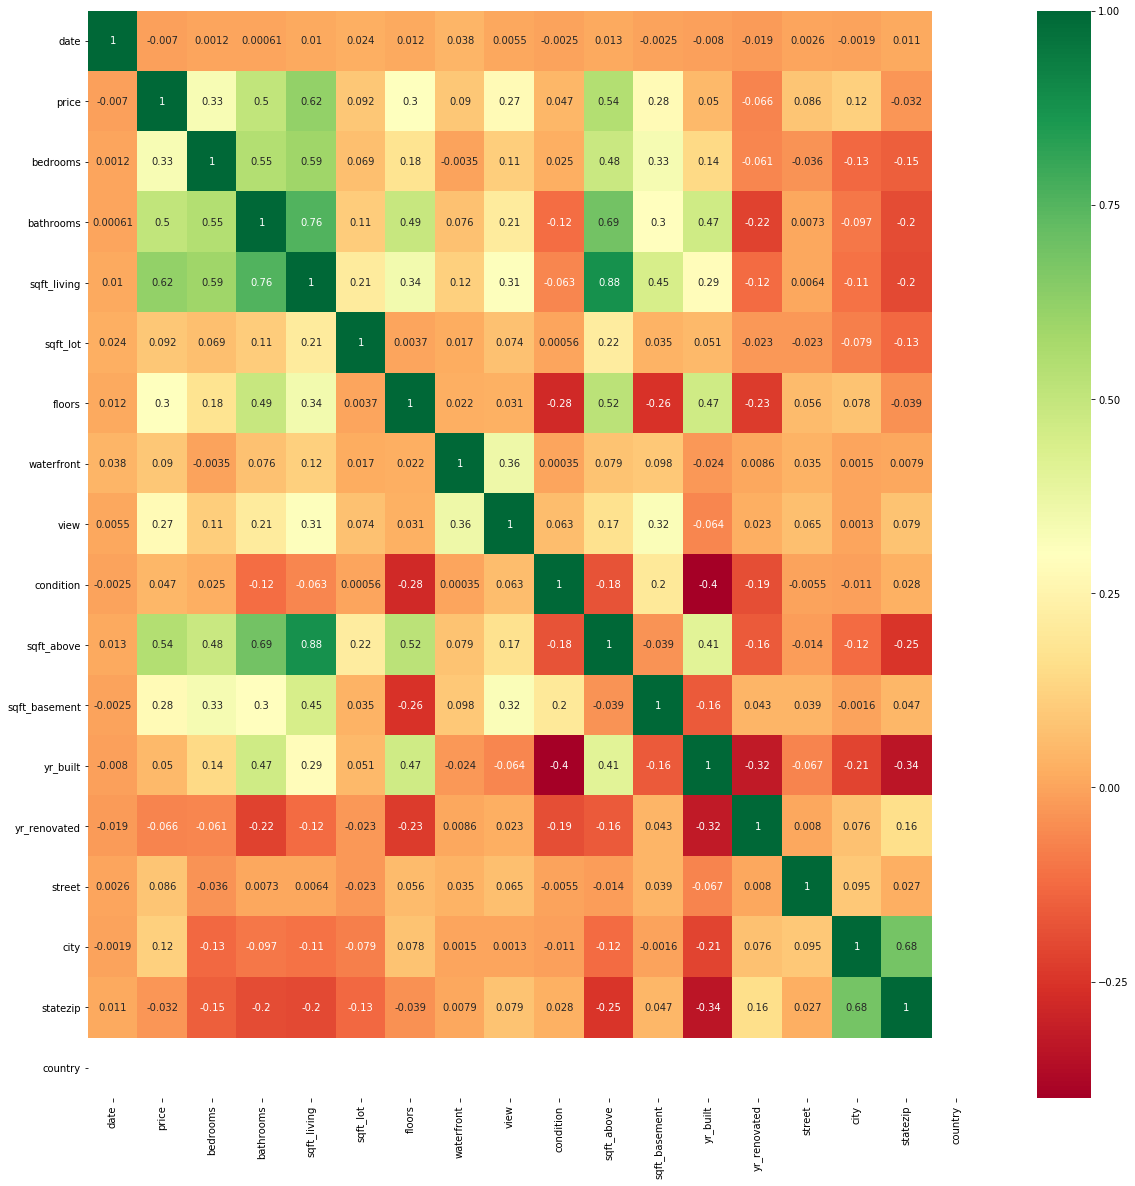

In [16]:
plt.figure(figsize=(20,20))
g = sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")
plt.style.use('fivethirtyeight')

##### Plot between floors and price using seaborn

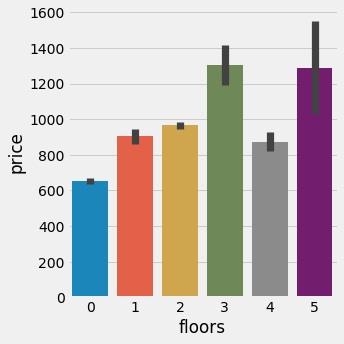

In [17]:
sns.catplot(x = 'floors', y = 'price', kind = 'bar', data = X)

##### Distribution plot for Price column

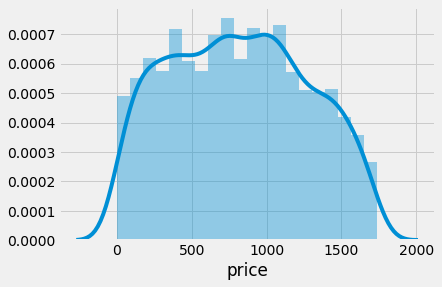

In [18]:
sns.distplot( X['price']);

##### Kde plot between price and yr_renovated columns 

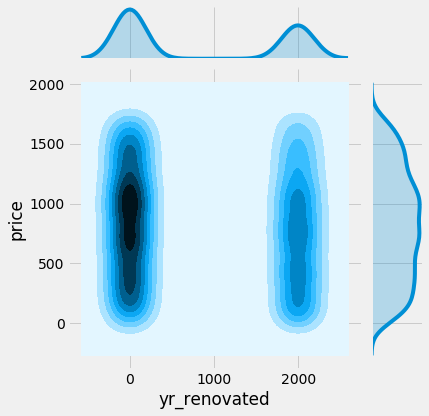

In [19]:
sns.jointplot(x = 'yr_renovated', y = 'price', kind = 'kde', data = X)

##### Swarm plot between price and bedroom column 

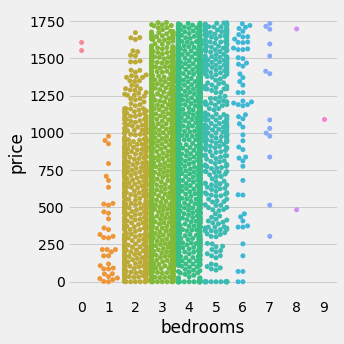

In [20]:
sns.catplot(x = 'bedrooms', y = 'price', kind = 'swarm', data = X)

##### Hex plot between sqft_living and price columns

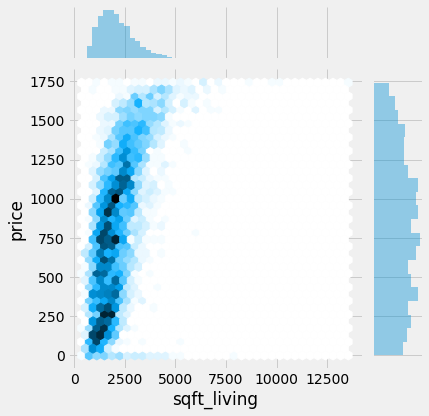

In [21]:
g = sns.jointplot(x = 'sqft_living', y = 'price', kind = 'hex', data = X)

##### Relational plot between city and price columns

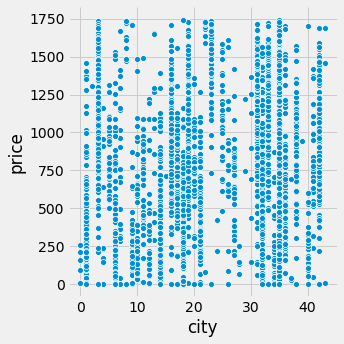

In [22]:
g = sns.relplot(x = 'city', y = 'price', data = X)

In [23]:
gb1 = X.groupby(['price', 'sqft_living'])
gb1.first().tail()

,,date,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
price,sqft_living,,,,,,,,,,,,,,,,
1736,6430,41,4,10,27517,2,0,0,3,6430,0,2001,0,319,3,3,0
1737,9640,40,5,24,13068,0,1,4,3,4820,4820,1983,2009,3463,23,25,0
1738,10040,67,5,16,37325,2,1,2,3,7680,2360,1940,2001,3286,3,3,0
1739,2190,46,3,8,11394,0,0,0,3,1550,640,1956,2001,3573,35,74,0
1740,1180,7,3,6,7793,0,0,0,4,1180,0,1992,0,408,18,19,0


##### X_New dataset will be used in spiting process 

In [24]:
X_New = X.drop(['date', 'yr_renovated', 'country', 'statezip', 'price'], axis = 'columns')

In [25]:
X_New.head(10)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,street,city
0,3,4,1340,7912,1,0,0,3,1340,0,1955,1522,36
1,5,8,3650,9050,2,0,4,5,3370,280,1921,3899,35
2,3,6,1930,11947,0,0,0,4,1930,0,1966,2291,18
3,3,7,2000,8030,0,0,0,4,1000,1000,1963,4263,3
4,4,8,1940,10500,0,0,0,4,1140,800,1976,4352,31
5,2,2,880,6380,0,0,0,3,880,0,1938,3521,35
6,2,6,1350,2560,0,0,0,3,1350,0,1976,2286,31
7,4,8,2710,35868,2,0,0,3,2710,0,1989,2038,21
8,3,8,2430,88426,0,0,0,4,1570,860,1985,3369,27
9,4,6,1520,6200,1,0,0,3,1520,0,1945,3846,35


##### Dependent column denoted as 'y' which will be predicted

In [26]:
y = np.array(X['price'])
y = y.reshape(-1,1)

In [27]:
gb2 = X_New.groupby([ 'sqft_living'])
gb2.first().head()

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,street,city
sqft_living,,,,,,,,,,,,
370,1,1,1801,0,0,0,5,370,0,1923,2182,35
380,1,1,15000,0,0,0,3,380,0,1963,746,6
420,1,1,6720,0,0,0,3,420,0,1922,3603,35
430,1,1,5050,0,0,0,2,430,0,1912,2718,7
490,3,1,38500,1,0,0,4,490,0,1959,393,37


##### Pairplot of all the columns in X_New dataset 

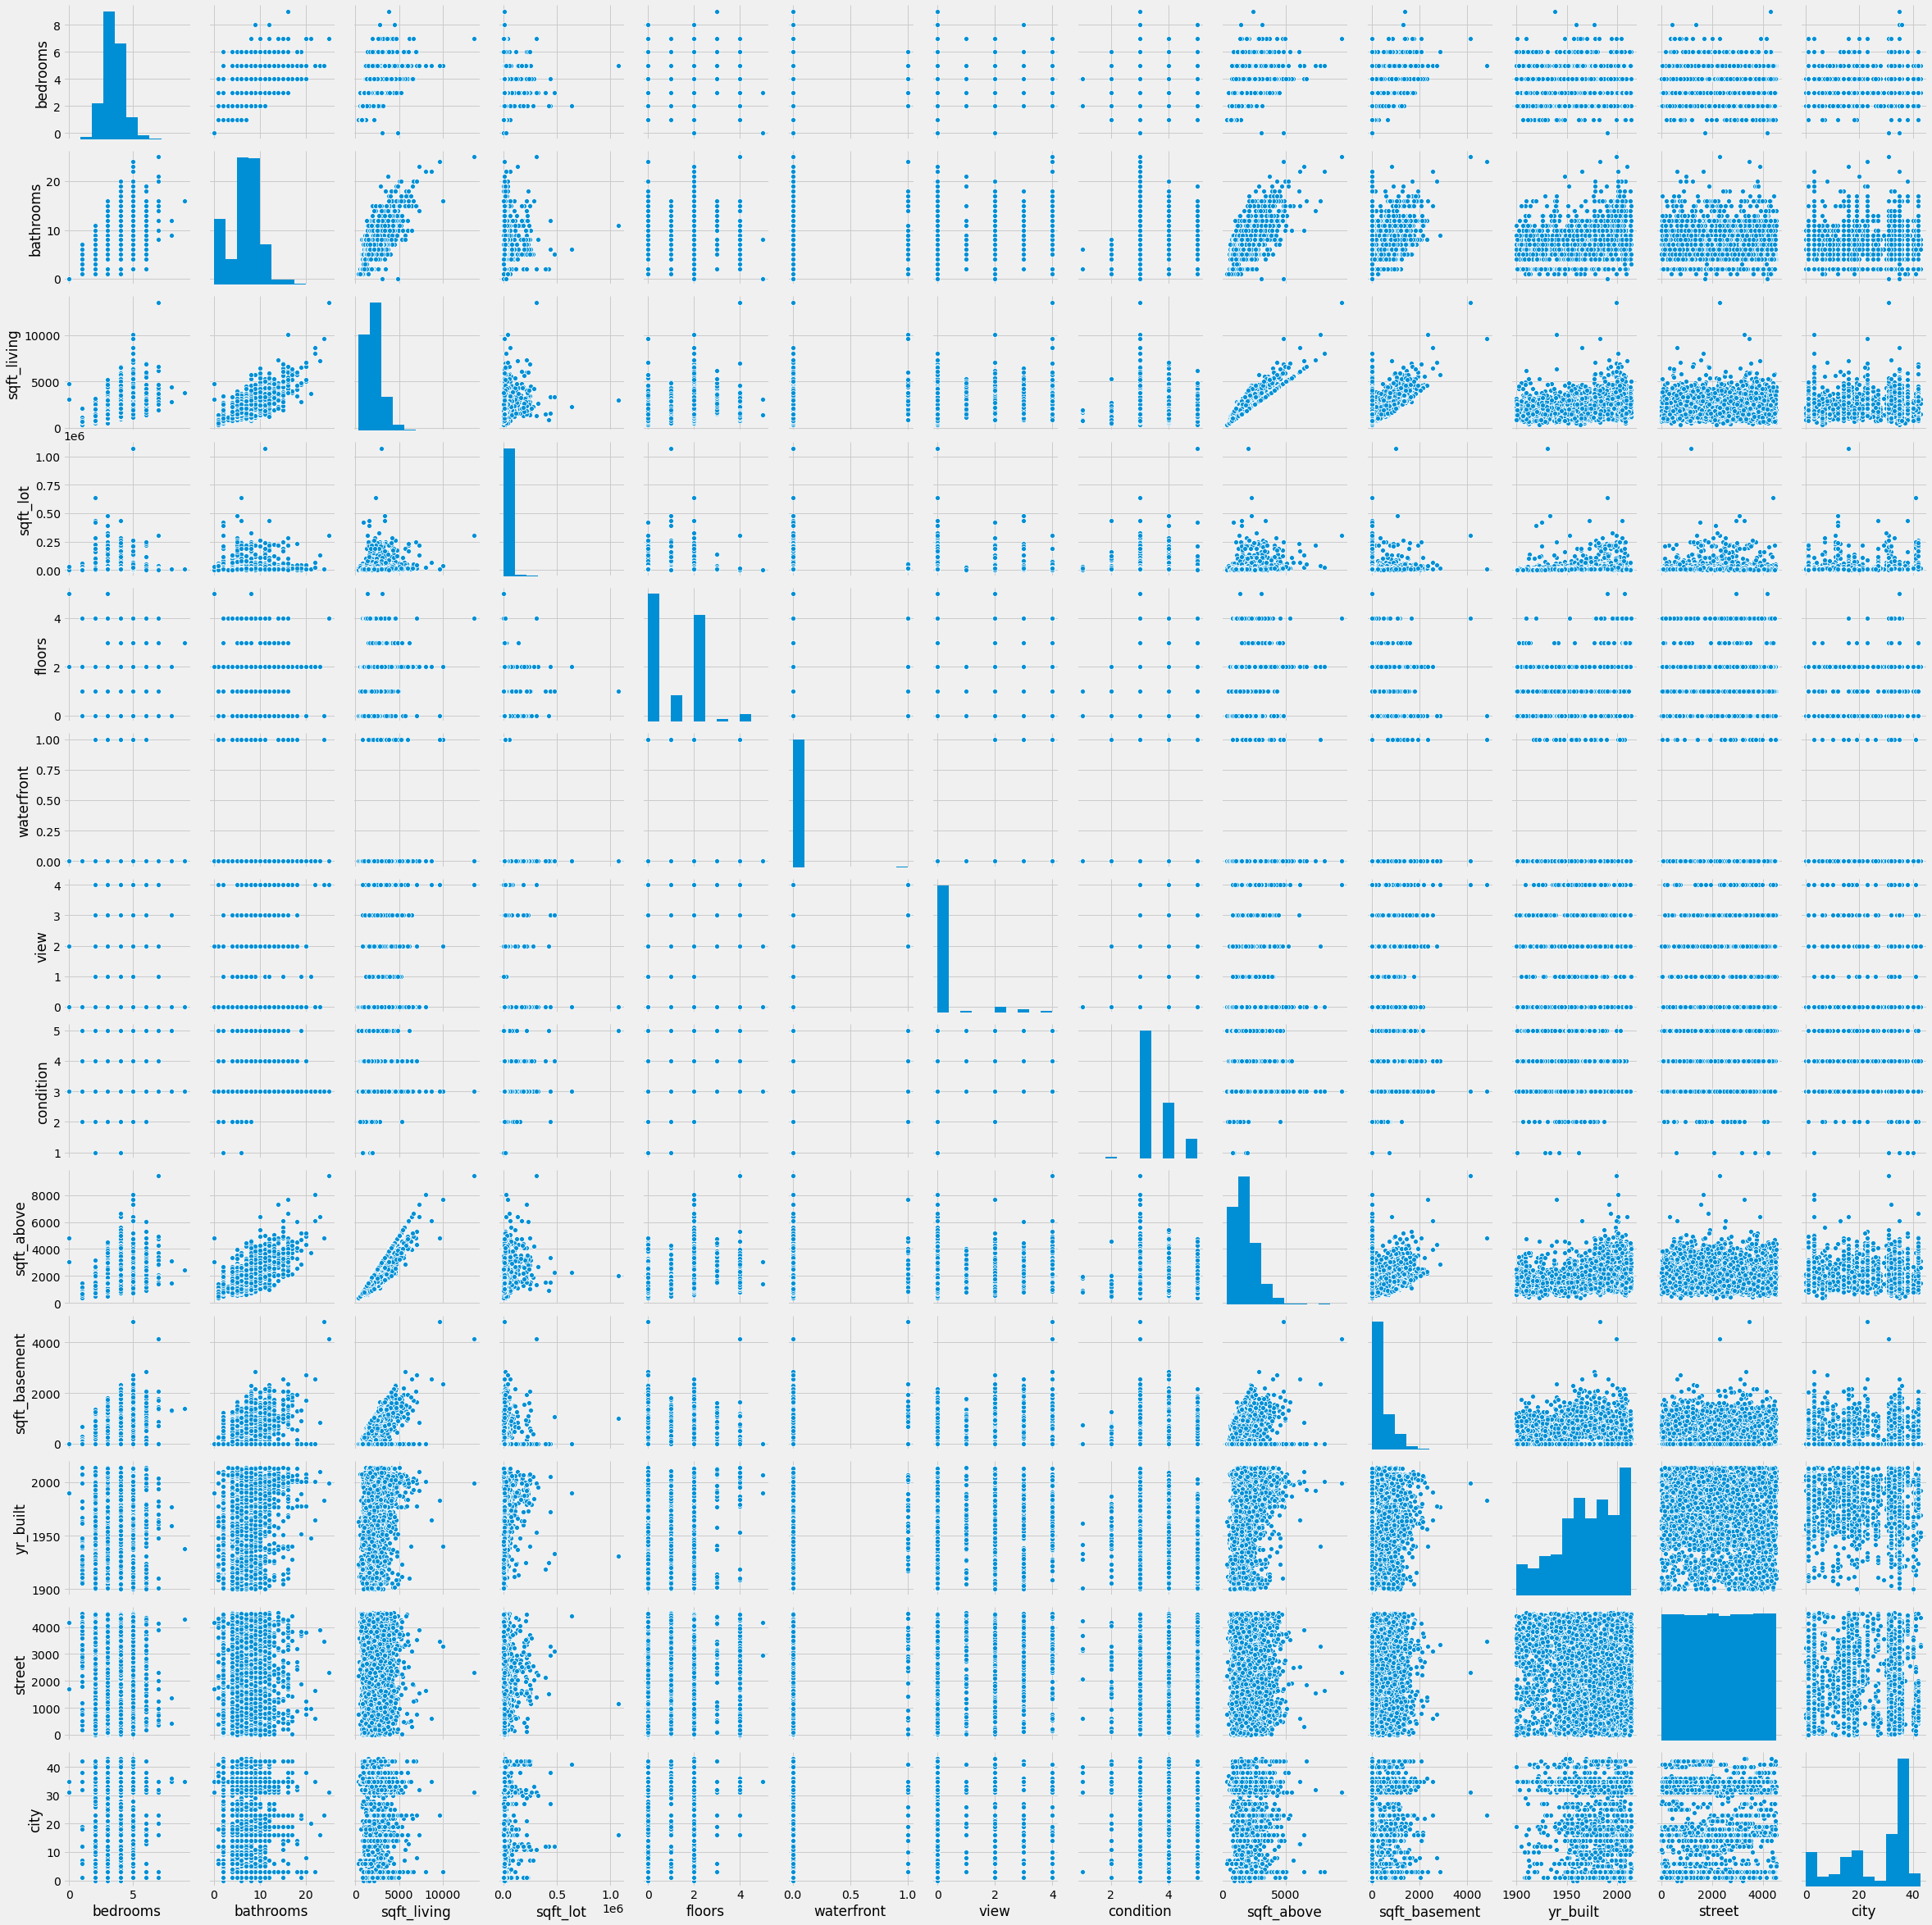

In [28]:
sns.pairplot(X_New);

##### Spliting of X_New and y dataset for training and testing purpose.
##### Spliting of the dataset with ratio 7 : 3 ,that is, training will done for 70 %
##### of the dataset and testing will be done for 30 % of the dataset.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_New, y, test_size = 0.3)

In [29]:
len(X_train)

3220

In [30]:
len(X_test)

1380

##### Standardization of X_train and X_test

In [31]:
scaler = StandardScaler()

In [32]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Different algorithm methods for prediction 

##### Linear Regression

In [65]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
linear.score(X_test, y_test)

0.4509815179909543

In [67]:
linear_score = round(linear.score(X_test, y_test)*100, 2)

In [68]:
linear_score

45.1

##### Lasso Regression 
##### RandomnizedSearchCV method is a hyperparameter tunning method, for selection of best parameter that gives high accuracy

In [39]:
random_grid_lasso = {'alpha': [1,10,30,40,0.1],
              'selection': ['cyclic', 'random'],
               'max_iter': [1000,900,1100]}

In [40]:
lasso = Lasso()
lasso_random = RandomizedSearchCV(estimator = lasso, param_distributions = random_grid_lasso, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [41]:
lasso_random.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   49.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   50.7s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                                   max_iter=1000, normalize=False,
                                   positive=False, precompute=False,
                                   random_state=None, selection='cyclic',
                                   tol=0.0001, warm_start=False),
                   iid='warn', n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': [1, 10, 30, 40, 0.1],
                                        'max_iter': [1000, 900, 1100],
                                        'selection': ['cyclic', 'random']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [42]:
lasso_random.best_params_

{'selection': 'random', 'max_iter': 900, 'alpha': 0.1}

In [43]:
lasso_random.best_score_

0.45770457414616544

In [44]:
lasso_score = round((lasso_random.best_score_)*100, 2)

In [45]:
lasso_score

45.77

##### Ridge Regression

In [46]:
ridge = Ridge()

In [47]:
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [48]:
ridge.score(X_test, y_test)

0.45099422480599105

In [49]:
ridge_score = round(ridge.score(X_test, y_test)*100, 2)

In [50]:
ridge_score

45.1

##### Stochastic Gradient Descent  

In [51]:
random_grid_sgd = {'alpha': [0.001,0.01,0.1,0.0001],
                  'penalty': ['l2','l1','elasticnet'],
                   'max_iter': [1000,900,1100],
                  'learning_rate': ['optimal','invscaling'],
                  'epsilon': [0.1,0.01,1,0]}

In [52]:
sgd = SGDRegressor()
sgd_random = RandomizedSearchCV(estimator = sgd, param_distributions = random_grid_sgd, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [53]:
sgd_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 441 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 493 out of 500 | elapsed:   10.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   10.4s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=SGDRegressor(alpha=0.0001, average=False,
                                          early_stopping=False, epsilon=0.1,
                                          eta0=0.01, fit_intercept=True,
                                          l1_ratio=0.15,
                                          learning_rate='invscaling',
                                          loss='squared_loss', max_iter=1000,
                                          n_iter_no_change=5, penalty='l2',
                                          power_t=0.25, random_state=None,
                                          shuffle=True, tol=0.001,
                                          validation_fraction=0.1, verbose=0,
                                          warm_start=False),
                   iid='warn', n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': [0.001, 0.01, 0.1, 0.0001],
                            

In [54]:
sgd_random.best_params_

{'penalty': 'l1',
 'max_iter': 1000,
 'learning_rate': 'invscaling',
 'epsilon': 0.01,
 'alpha': 0.0001}

In [55]:
sgd_random.best_score_

0.46048892755141846

In [56]:
sgd_score = round((sgd_random.best_score_)*100, 2)

In [57]:
sgd_score

46.05

##### Support Vector Regressor 

In [58]:
random_grid_svr = {'gamma': ['scale', 'auto'],
                  'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                   'C': [1,10,30,40],
                  'epsilon': [0.1,0.01,1,0]}

In [60]:
svr = SVR()
svr_random = RandomizedSearchCV(estimator = svr, param_distributions = random_grid_svr, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [61]:
svr_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.2min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False),
                   iid='warn', n_iter=100, n_jobs=-1,
                   param_distributions={'C': [1, 10, 30, 40],
                                        'epsilon': [0.1, 0.01, 1, 0],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [69]:
svr_random.best_params_

{'kernel': 'rbf', 'gamma': 'auto', 'epsilon': 1, 'C': 40}

In [70]:
svr_random.best_score_

0.49420287181307554

In [71]:
svr_score = round((svr_random.best_score_)*100, 2)

In [72]:
svr_score

49.42

##### Decision Tree Regressor

In [73]:
random_grid_dtr = {'criterion': ['mse', 'friedman_mse', 'mae'],
                  'splitter': ['best', 'random'],
                   'min_samples_split': [2,5,3],
                  'min_samples_leaf': [6,3,1],
                  'max_features':['auto', 'sqrt', 'log2']}

In [120]:
dtr = DecisionTreeRegressor()
dtr_random = RandomizedSearchCV(estimator = dtr, param_distributions = random_grid_dtr, n_iter = 100, cv = 5, verbose=3, random_state=42, n_jobs = -1)

In [121]:
dtr_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 435 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 493 out of 500 | elapsed:  2.2min remaining:    1.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.2min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=DecisionTreeRegressor(criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort=False,
                                                   random_state=None,
                                                   splitter='best'),
                   iid='warn', n_iter=100, n_jobs=-1,
                   param_dis

In [122]:
dtr_random.best_params_

{'splitter': 'best',
 'min_samples_split': 3,
 'min_samples_leaf': 6,
 'max_features': 'auto',
 'criterion': 'mse'}

In [123]:
dtr_random.best_score_

0.48591175251749447

In [124]:
dtr_score = round((dtr_random.best_score_)*100, 2)

In [125]:
dtr_score

48.59

##### Random Forest Regressor

In [80]:
rfr = RandomForestRegressor()

In [81]:
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [82]:
rfr.score(X_test, y_test)

0.6160395270615013

In [83]:
rfr_score =round(rfr.score(X_test, y_test)*100, 2)

In [84]:
rfr_score

61.6

##### Dataframe containing columns Model and Score 
##### for selecting the best model according to the score

In [90]:
models = pd.DataFrame({
    
    'Model': ['Support Vector Regressor','Ridge Regression', 'Lasso Regression',
              'Random Forest Regressor','Stochastic Gradient Decent', 'Linear Regression',
              'Decision Tree Regressor'],
    'Score': [svr_score, ridge_score, lasso_score,
              rfr_score, sgd_score, linear_score,
              dtr_score]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest Regressor,61.60
0,Support Vector Regressor,49.42
6,Decision Tree Regressor,48.58
4,Stochastic Gradient Decent,46.05
2,Lasso Regression,45.77
1,Ridge Regression,45.10
5,Linear Regression,45.10


##### Since Random Forest Regressor gives the best accuracy among all
##### so this algoritm is best suited for predicting price of the houses

In [86]:
rfr.score(X_test, y_test)

0.6160395270615013

In [87]:
y_predicted = rfr.predict(X_test)
y_predicted

array([1485.1,  428.1,  500.3, ..., 1023.4, 1055.7,  883.6])

In [106]:
y_test = np.array(y_test)
y_predicted = np.array(y_predicted)

##### Mean Absolute score and mean Squared score

In [113]:
print('R2 score : ', round(r2_score(y_test, y_predicted)*100, 2))
print('MAE score : ', mean_absolute_error(y_test, y_predicted))
print('MSE score : ', mean_squared_error(y_test, y_predicted))

R2 score :  61.6
MAE score :  205.25231884057973
MSE score :  80500.68282608697


Text(0.5, 1.0, 'Graph for y_predicted')

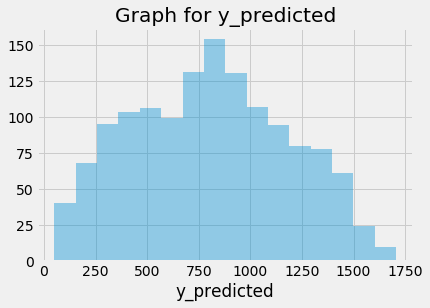

In [119]:
sns.distplot(y_predicted, kde = False)
plt.xlabel('y_predicted')
plt.title('Graph for y_predicted')

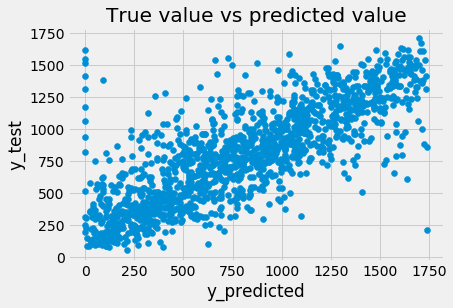

In [118]:
plt.scatter(y_test, y_predicted)

plt.xlabel('y_predicted')
plt.ylabel('y_test')

plt.title('True value vs predicted value')

plt.grid(True)

plt.style.use('fivethirtyeight')